# 2D meshing: xy cross-section

You can supply the argument `type="xy"` and a `z`-value, to mesh arbitrary `Component` planar cross-sections.

In [1]:
from gdsfactory.pdk import get_layer_stack
from gdsfactory.technology import LayerStack, LayerLevel
from gdsfactory.simulation.gmsh.mesh import create_physical_mesh
import meshio
from skfem.io import from_meshio
import gdsfactory as gf
from gdsfactory.generic_tech import get_generic_pdk

gf.config.rich_output()
PDK = get_generic_pdk()
PDK.activate()

waveguide = gf.components.straight_pin(length=10, taper=None)
waveguide

2023-02-20 17:55:58.270 | INFO     | gdsfactory.config:<module>:50 - Load '/home/runner/work/gdsfactory/gdsfactory/gdsfactory' 6.43.1


2023-02-20 17:55:59.639 | INFO     | gdsfactory.technology.layer_views:__init__:785 - Importing LayerViews from YAML file: /home/runner/work/gdsfactory/gdsfactory/gdsfactory/generic_tech/layer_views.yaml.


2023-02-20 17:55:59.646 | INFO     | gdsfactory.pdk:activate:206 - 'generic' PDK is now active


AppLayout(children=(Tab(children=(VBox(children=(HBox(children=(Button(layout=Layout(border_bottom='solid 2px …

straight_pin_length10_taperNone: uid 13eeec9b, ports ['o1', 'o2', 'bot_e1', 'bot_e2', 'bot_e3', 'bot_e4', 'top_e1', 'top_e2', 'top_e3', 'top_e4'], references ['straight_1', 'via_stack_1', 'via_stack_2'], 0 polygons


In [2]:
filtered_layerstack = LayerStack(
    layers={
        k: get_layer_stack().layers[k]
        for k in (
            "slab90",
            "core",
            "via_contact",
        )
    }
)

In [3]:
filename = "mesh"

def mesh_with_physicals(mesh, filename):
    mesh_from_file = meshio.read(f"{filename}.msh")
    return create_physical_mesh(mesh_from_file, "triangle", prune_z=True)

At `z=0.09` um, according to the layer stack above we should see polygons from all three layers:

/usr/share/miniconda/envs/anaconda-client-env/lib/python3.9/site-packages/shapely/set_operations.py:133: RuntimeWarning: invalid value encountered in intersection
  return lib.intersection(a, b, **kwargs)
/usr/share/miniconda/envs/anaconda-client-env/lib/python3.9/site-packages/shapely/set_operations.py:133: RuntimeWarning: invalid value encountered in intersection
  return lib.intersection(a, b, **kwargs)
/usr/share/miniconda/envs/anaconda-client-env/lib/python3.9/site-packages/shapely/set_operations.py:133: RuntimeWarning: invalid value encountered in intersection
  return lib.intersection(a, b, **kwargs)
/usr/share/miniconda/envs/anaconda-client-env/lib/python3.9/site-packages/shapely/set_operations.py:133: RuntimeWarning: invalid value encountered in intersection
  return lib.intersection(a, b, **kwargs)
/usr/share/miniconda/envs/anaconda-client-env/lib/python3.9/site-packages/shapely/set_operations.py:133: RuntimeWarning: invalid value encountered in intersection
  return lib.inte

[]

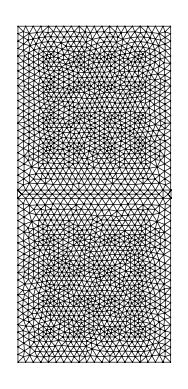

In [4]:
filename = "mesh"
mesh = waveguide.to_gmsh(
    type="xy", z=0.09, layer_stack=filtered_layerstack, filename=f"{filename}.msh"
)
mesh = mesh_with_physicals(mesh, filename)
mesh = from_meshio(mesh)
mesh.draw().plot()

At `z=0`, you can see only the core and slab:

[]

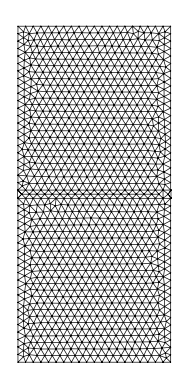

In [5]:
mesh = waveguide.to_gmsh(
    type="xy", z=0.0, layer_stack=filtered_layerstack, filename=f"{filename}.msh"
)
mesh = mesh_with_physicals(mesh, filename)
mesh = from_meshio(mesh)
mesh.draw().plot()

At `z=1.0`, you can only see the vias appear:

[]

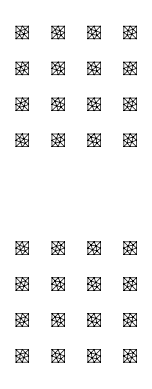

In [6]:
mesh = waveguide.to_gmsh(
    type="xy", z=1.0, layer_stack=filtered_layerstack, filename=f"{filename}.msh"
)
mesh = mesh_with_physicals(mesh, filename)
mesh = from_meshio(mesh)
mesh.draw().plot()

## Controlling meshing domain

You can use functions that return other components to modify the simulation domain, for instance `gdsfactory.geometry.trim`:

In [7]:
waveguide_trimmed = gf.Component()
waveguide_trimmed.add_ref(
    gf.geometry.trim(
        component=waveguide,
        domain=[[3, -4], [3, 4], [5, 4], [5, -4]],
    )
)

waveguide_trimmed

/home/runner/work/gdsfactory/gdsfactory/gdsfactory/component.py:1684: UserWarning: Component 'Unnamed_38612dd9' contains 1 Unnamed cells
  warnings.warn(


AppLayout(children=(Tab(children=(VBox(children=(HBox(children=(Button(layout=Layout(border_bottom='solid 2px …

Unnamed_38612dd9: uid 38612dd9, ports [], references ['trim_1'], 0 polygons


/usr/share/miniconda/envs/anaconda-client-env/lib/python3.9/site-packages/shapely/set_operations.py:133: RuntimeWarning: invalid value encountered in intersection
  return lib.intersection(a, b, **kwargs)
/usr/share/miniconda/envs/anaconda-client-env/lib/python3.9/site-packages/shapely/set_operations.py:133: RuntimeWarning: invalid value encountered in intersection
  return lib.intersection(a, b, **kwargs)
/usr/share/miniconda/envs/anaconda-client-env/lib/python3.9/site-packages/shapely/set_operations.py:133: RuntimeWarning: invalid value encountered in intersection
  return lib.intersection(a, b, **kwargs)
/usr/share/miniconda/envs/anaconda-client-env/lib/python3.9/site-packages/shapely/set_operations.py:133: RuntimeWarning: invalid value encountered in intersection
  return lib.intersection(a, b, **kwargs)
/usr/share/miniconda/envs/anaconda-client-env/lib/python3.9/site-packages/shapely/set_operations.py:133: RuntimeWarning: invalid value encountered in intersection
  return lib.inte

[]

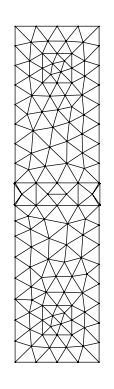

In [8]:
mesh = waveguide_trimmed.to_gmsh(
    type="xy", z=0.09, layer_stack=filtered_layerstack, filename=f"{filename}.msh"
)
mesh = mesh_with_physicals(mesh, filename)
mesh = from_meshio(mesh)
mesh.draw().plot()